### PRAGADEESH M
## 225229126

### Step-1:Dataset creation

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
df.sample(5)

,text,target
24,விட்டுவிட்டு வேறு ஏதாவது முயற்சி செய்து பாருங்கள்,1
6,நீங்கள் நரகத்தை அனுபவிக்கிறீர்கள் என்றால் தொடர...,0
4,நீங்கள் இருக்கும் இடத்திலேயே தொடங்குங்கள் உங்க...,0
3,நல்லது சிறந்தது சிறந்தது அதை ஒருபோதும் ஓய்வெடு...,0
37,உங்களை ஒரு அசிங்கமான நபராக நினைக்காதீர்கள்,1


In [3]:
df.shape

(40, 2)

### Step2: Pre-processing

In [9]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 209 unique tokens.


In [10]:
word_index

{'நீங்கள்': 1,
 'ஒரு': 2,
 'அது': 3,
 'உங்கள்': 4,
 'எப்போதும்': 5,
 'சிறந்தது': 6,
 'செய்யுங்கள்': 7,
 'வரை': 8,
 'முயற்சி': 9,
 'முடியாதது': 10,
 'எதுவுமில்லை': 11,
 'என்பது': 12,
 'அல்ல': 13,
 'ஒருபோதும்': 14,
 'புதிய': 15,
 'வெற்றி': 16,
 'எனக்கு': 17,
 'காரணம்': 18,
 'என்று': 19,
 'முடியும்': 20,
 'செய்பவர்களால்': 21,
 'நல்லது': 22,
 'உங்களிடம்': 23,
 'உங்களால்': 24,
 'முடிந்ததைச்': 25,
 'என்றால்': 26,
 'நடக்காது': 27,
 'தோல்வி': 28,
 'எல்லா': 29,
 'ஆனால்': 30,
 'நம்பிக்கை': 31,
 'இல்லை': 32,
 'ஏனென்றால்': 33,
 'கொண்ட': 34,
 'உண்மையில்': 35,
 'பாருங்கள்': 36,
 'வேண்டாம்': 37,
 'மற்றும்': 38,
 'கொள்ளுங்கள்': 39,
 'நபராக': 40,
 'உங்களை': 41,
 'சாத்தியமற்றதாகத்': 42,
 'தெரிகிறது': 43,
 'தரம்': 44,
 'செயல்': 45,
 'பழக்கம்': 46,
 'அதை': 47,
 'ஓய்வெடுக்க': 48,
 'விடாதீர்கள்': 49,
 'நன்மை': 50,
 'இருக்கும்': 51,
 'இடத்திலேயே': 52,
 'தொடங்குங்கள்': 53,
 'உள்ளதை': 54,
 'பயன்படுத்துங்கள்': 55,
 'நாளோடு': 56,
 'பலமும்': 57,
 'எண்ணங்களும்': 58,
 'வருகின்றன': 59,
 'நரகத்தை': 60,
 'அனுபவிக்கிறீ

### Step3: Dataset Preparation

In [15]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (40, 20)


In [16]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          3,  20,   8,   3,   5,  42,  43],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   9,  21,  10,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44,
         12,   2,  45,  13,   3,   2,  46],
       [  0,   0,   0,   0,   0,   0,   0,  22,   6,   6,  47,  14,  48,
         49,   4,  50,   6,   4,  22,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  51,  52,
         53,  23,  54,  55,  24,  25,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         15,  56,  15,  57,  15,  58,  59],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,  60,  61,  26,  62],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  63,
          8,   1,  64,  65,  66,  12,  67],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [8]:
y = df['target'].values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (40,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(30, 20) (30,)
(10, 20) (10,)


### Step4: Model Creation

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

In [12]:
def layerandnodes(n,l):
    model = Sequential()
    for x in range(l):
        model.add(Dense(n,input_shape=(20,),activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='MeanSquaredError',optimizer='RMSprop',metrics='accuracy')
    return model

model = layerandnodes(32,1)

In [13]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss')

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.4535 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4441 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4275 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4287 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4043 - accuracy: 0.5667
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3939 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3908 - accuracy: 0.5667
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3879 - accuracy: 0.5667
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3871 - accuracy: 0.5667
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3910 - accuracy: 0.5667
Epoch 11/100
1/1 [===

In [15]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 317ms/step - loss: 0.5033 - accuracy: 0.5000


[0.5032526254653931, 0.5]

In [14]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 171ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
input_txt = tokenizer.texts_to_sequences(['சிறந்த வேலையைச் செய்வதற்கு ஒரே வழி நீங்கள் செய்வதை நேசிப்பதே'])
input_txt = pad_sequences(input_txt, maxlen=MAX_SEQUENCE_LENGTH)

predict_x=model.predict(input_txt) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 42ms/step


array([0], dtype=int64)

In [17]:
input_txt = tokenizer.texts_to_sequences(['அது முடிந்துவிட்டது என்று அழ வேண்டாம்'])
input_txt = pad_sequences(input_txt, maxlen=MAX_SEQUENCE_LENGTH)

predict_x=model.predict(input_txt) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 41ms/step


array([0], dtype=int64)

### Step5:Analysis Part-A
8nodes

In [18]:
model1 = layerandnodes(8,1)
model1.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model1.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 863ms/step - loss: 0.4802 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4570 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4531 - accuracy: 0.5667
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4505 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4485 - accuracy: 0.5667
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4469 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4450 - accuracy: 0.5667
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4435 - accuracy: 0.5667
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4430 - accuracy: 0.5667
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4411 - accuracy: 0.5667
Epoch 11/100
1/1 [

[0.4000000059604645, 0.6000000238418579]

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


16nodes

In [20]:
model2 = layerandnodes(16,1)
model2.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model2.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 855ms/step - loss: 0.5283 - accuracy: 0.4333
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4892 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4663 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4534 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4526 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 243ms/step - loss: 0.3204 - accuracy: 0.7000


[0.320447713136673, 0.699999988079071]

In [21]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


64nodes

In [22]:
model3 = layerandnodes(64,1)
model3.fit(X_train,y_train,epochs=100,callbacks=[EarlyStopping(monitor='loss',patience=3)])
model3.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 869ms/step - loss: 0.4508 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4421 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4207 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3963 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3885 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3814 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 0.3698 - accuracy: 0.5667
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3617 - accuracy: 0.6333
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3557 - accuracy: 0.6333
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3509 - accuracy: 0.6333
Epoch 11/100
1/1 [

[0.41791781783103943, 0.6000000238418579]

In [23]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1344      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


128nodes

In [24]:
model4 = layerandnodes(128,1)
model4.fit(X_train,y_train,epochs=100,callbacks=[EarlyStopping(monitor='accuracy',patience=3)])
model4.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 849ms/step - loss: 0.4656 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3500 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3350 - accuracy: 0.6333
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4064 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3213 - accuracy: 0.6333
Epoch 6/100
1/1 [==============================] - 0s 232ms/step - loss: 0.4127 - accuracy: 0.6000


[0.41268405318260193, 0.6000000238418579]

In [25]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2688      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


256nodes

In [18]:
model5 = layerandnodes(256,1)
model5.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model5.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 851ms/step - loss: 0.3824 - accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3589 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 246ms/step - loss: 0.3797 - accuracy: 0.6000


[0.37968307733535767, 0.6000000238418579]

In [27]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               5376      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


512nodes

In [16]:
model6 = layerandnodes(512,1)
model6.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model6.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 854ms/step - loss: 0.5380 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5335 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5335 - accuracy: 0.4667
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5334 - accuracy: 0.4667
Epoch 11/100
1/1 [

[0.4000000059604645, 0.6000000238418579]

In [29]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               10752     
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1028nodes

In [17]:
model7 = layerandnodes(1028,1)
model7.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model7.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 874ms/step - loss: 0.3843 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 245ms/step - loss: 0.4000 - accuracy: 0.6000


[0.4000000059604645, 0.6000000238418579]

In [31]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1028)              21588     
                                                                 
 dense_15 (Dense)            (None, 1)                 1029      
                                                                 
Total params: 22617 (88.35 KB)
Trainable params: 22617 (88.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


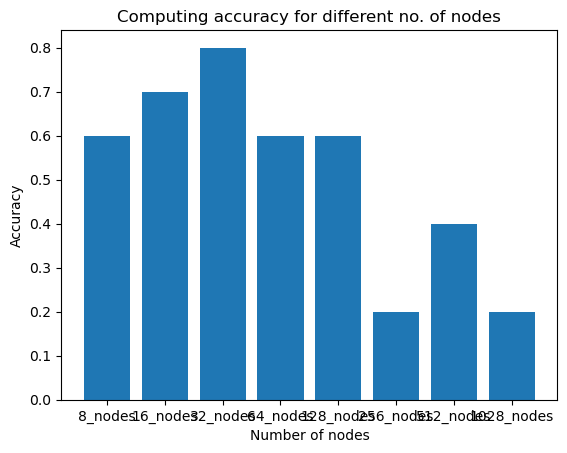

In [32]:
import matplotlib.pyplot as plt
# creating the barchart
bar={'8_nodes':0.6000,'16_nodes':0.6999,'32_nodes':0.8000,'64_nodes':0.6000,'128_nodes':0.6000,'256_nodes':0.2000,'512_nodes':0.4000,'1028_nodes':0.2000}
nodes = list(bar.keys())
acc = list(bar.values())

# creating the bar plot
plt.bar(nodes, acc)

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of nodes")
plt.show()

### Step-5 Analysis part-b

In [33]:
model9 = layerandnodes(32,2)
model9.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model9.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.4745 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4342 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3928 - accuracy: 0.5667
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3827 - accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3615 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3465 - accuracy: 0.6333
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2785 - accuracy: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2710 - accuracy: 0.7333
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2628 - accuracy: 0.7333
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2596 - accuracy: 0.7333
Epoch 11/100
1/1 [===

[0.4394885003566742, 0.5]

In [34]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                672       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1761 (6.88 KB)
Trainable params: 1761 (6.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model10 = layerandnodes(32,3)
model10.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model10.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2660 - accuracy: 0.7000
Epoch 2/100
1/1 [==============================] - 0s 259ms/step - loss: 0.6394 - accuracy: 0.3000


[0.6394017338752747, 0.30000001192092896]

In [36]:
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                672       
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model11 = layerandnodes(32,4)
model11.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model11.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3966 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3481 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1988 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1947 - accuracy: 0.6333
Epoch 5/100
1/1 [==============================] - 0s 273ms/step - loss: 0.3578 - accuracy: 0.6000


[0.3578239381313324, 0.6000000238418579]

In [38]:
model11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                672       
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model12 = layerandnodes(32,5)
model12.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model12.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.3092 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2292 - accuracy: 0.6333
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1848 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1744 - accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1399 - accuracy: 0.7333
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1236 - accuracy: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 288ms/step - loss: 0.4476 - accuracy: 0.4000


[0.4476081430912018, 0.4000000059604645]

In [40]:
model12.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                672       
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 

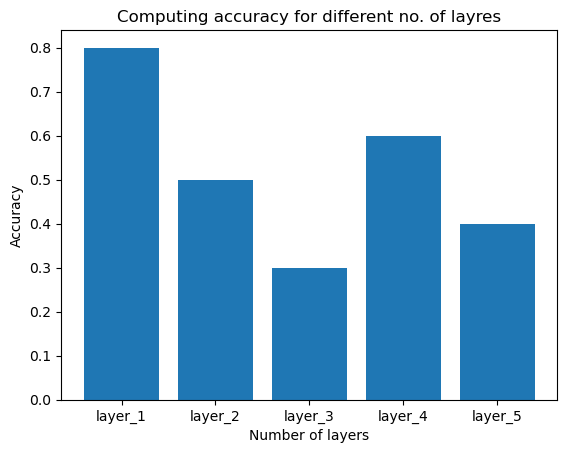

In [41]:
layers={'layer_1':0.8000,'layer_2':0.5000,'layer_3':0.3000,'layer_4':0.6000,'layer_5':0.4000}
nodes = list(layers.keys())
acc = list(layers.values())
plt.bar(nodes, acc)

plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of layres")
plt.show()